In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
RAND_STATE = 42 
TT_RATIO = 0.3 

In [3]:
processed_df=pd.read_csv("processed_dataset.csv")

In [4]:
processed_df['sexist'] = processed_df['sexist'].astype(int)

In [5]:
processed_df

,text,sexist,processed_text
0,MENTION3481 i didn't even know random was an o...,0,"['mention3481 didnt even know', 'didnt even kn..."
1,Bottom two should've gone! #mkr,0,"['bottom two shouldve gone', 'two shouldve gon..."
2,MENTION3111 MENTION3424 ladyboner deserves so ...,0,"['mention3111 mention3424 ladyboner deserves',..."
3,She shall now be known as Sourpuss #MKR #KatAn...,0,"['shall known sourpuss mkr', 'known sourpuss m..."
4,Tarah W threw a bunch of women under the bus s...,0,"['tarah w threw bunch', 'w threw bunch woman',..."
...,...,...,...
13340,this reminds me of the MENTION3079 situation; ...,0,"['reminds mention3079 situation sorry', 'menti..."
13341,#mkr I love Annie and loyld there like a real ...,0,"['mkr love annie loyld', 'love annie loyld lik..."
13342,No u. http://t.co/zOr0eWahSS,0,[]
13343,#mkr the way kat looks at Annie is like she's ...,0,"['mkr way kat look', 'way kat look annie', 'ka..."


In [6]:
df_stem=processed_df[['processed_text','sexist']]

In [7]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
stem_train_df, stem_test_df = train_test_split(df_stem, test_size=0.25, random_state=42)

# Print the shape of the resulting DataFrames
print(f"Training set shape: {stem_train_df.shape}")
print(f"Testing set shape: {stem_test_df.shape}")


Training set shape: (10008, 2)
Testing set shape: (3337, 2)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Get the training and testing texts and labels
train_texts = stem_train_df['processed_text']
train_labels = stem_train_df['sexist']
test_texts = stem_test_df['processed_text']
test_labels = stem_test_df['sexist']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_texts)  # Transform the training texts

# Transform the testing texts using the same vectorizer
test_features = vectorizer.transform(test_texts)

# Create an SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(train_features, train_labels)

# Make predictions on the test set
predictions = classifier.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8810


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(test_labels, predictions)
print(report)

Precision: 0.6284
Recall: 0.3024
F1-Score: 0.4083
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2884
           1       0.63      0.30      0.41       453

    accuracy                           0.88      3337
   macro avg       0.76      0.64      0.67      3337
weighted avg       0.86      0.88      0.86      3337



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV

# Get the training and testing texts and labels
train_texts = stem_train_df['processed_text']
train_labels = stem_train_df['sexist']
test_texts = stem_test_df['processed_text']
test_labels = stem_test_df['sexist']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_texts)  # Transform the training texts

# Transform the testing texts using the same vectorizer
test_features = vectorizer.transform(test_texts)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Create an SVM classifier
classifier = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='precision')
grid_search.fit(train_features, train_labels)

# Get the best classifier
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
predictions = best_classifier.predict(test_features)

# Calculate accuracy and precision
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")


/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mm527x/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classi

Accuracy: 0.8663
Precision: 0.8889


In [11]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.9008
Precision: 0.6459
Recall: 0.5960
F1-Score: 0.6200
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2884
           1       0.65      0.60      0.62       453

    accuracy                           0.90      3337
   macro avg       0.79      0.77      0.78      3337
weighted avg       0.90      0.90      0.90      3337



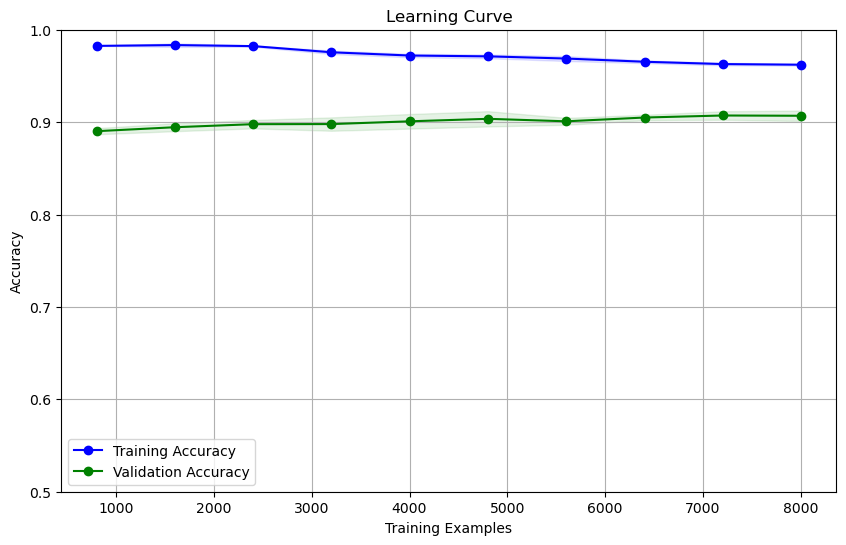

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

xgb_classifier = xgb.XGBClassifier()

# Define the train_sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier, X_train, y_train, cv=5, train_sizes=train_sizes, scoring='accuracy'
)

# Calculate the mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
    alpha=0.1, color='b'
)
plt.fill_between(
    train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
    alpha=0.1, color='g'
)
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits to make the curves closer
plt.legend(loc='best')
plt.show()


In [20]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='precision')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = grid_search.best_params_

# Train a final model using the best hyperparameter configuration
final_model = xgb.XGBClassifier(learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'])
final_model.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8786
Precision: 0.6538
Recall: 0.2252
F1-Score: 0.3350
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2884
           1       0.65      0.23      0.33       453

    accuracy                           0.88      3337
   macro avg       0.77      0.60      0.63      3337
weighted avg       0.86      0.88      0.85      3337



In [14]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_lambda': [0, 1],
    'reg_alpha': [0, 1],
    'min_child_weight': [1, 5]
}


# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='precision')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = grid_search.best_params_

# Train a final model using the best hyperparameter configuration
final_model = xgb.XGBClassifier(learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'])
final_model.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


KeyboardInterrupt: 

In [21]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.1],
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 500),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_lambda': [0, 1],
    'reg_alpha': [0, 1],
    'min_child_weight': [1, 5]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, scoring='precision', n_iter=10, cv=5)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = random_search.best_params_

# Train a final model using the best hyperparameter configuration
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8786
Precision: 0.6519
Recall: 0.2274
F1-Score: 0.3372
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2884
           1       0.65      0.23      0.34       453

    accuracy                           0.88      3337
   macro avg       0.77      0.60      0.64      3337
weighted avg       0.86      0.88      0.85      3337



In [19]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.001, 0.01],
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 500),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_lambda': [0, 10],
    'reg_alpha': [0, 10],
    'min_child_weight': [1, 5]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, scoring='precision', n_iter=10, cv=5)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = random_search.best_params_

# Adjust learning rate
best_params['learning_rate'] = 0.001

# Increase regularization strength
best_params['reg_lambda'] = 10
best_params['reg_alpha'] = 10

# Train a final model using the best hyperparameter configuration
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8726
Precision: 0.6094
Recall: 0.1722
F1-Score: 0.2685
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2884
           1       0.61      0.17      0.27       453

    accuracy                           0.87      3337
   macro avg       0.75      0.58      0.60      3337
weighted avg       0.85      0.87      0.84      3337



In [22]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, scoring='precision', n_iter=10, cv=5)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = random_search.best_params_

# Adjust learning rate
best_params['learning_rate'] = 0.001

# Increase regularization strength
best_params['reg_lambda'] = 10
best_params['reg_alpha'] = 10

# Train a final model using the best hyperparameter configuration
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8690
Precision: 0.5588
Recall: 0.1678
F1-Score: 0.2581
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2884
           1       0.56      0.17      0.26       453

    accuracy                           0.87      3337
   macro avg       0.72      0.57      0.59      3337
weighted avg       0.84      0.87      0.84      3337



In [21]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, scoring='precision', n_iter=10, cv=5)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = random_search.best_params_

# Train a final model using the best hyperparameter configuration
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = final_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8897
Precision: 0.6218
Recall: 0.4790
F1-Score: 0.5411
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2884
           1       0.62      0.48      0.54       453

    accuracy                           0.89      3337
   macro avg       0.77      0.72      0.74      3337
weighted avg       0.88      0.89      0.88      3337



In [23]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0, colsample_bytree=0.8, gamma=0, reg_lambda=1, reg_alpha=0, min_child_weight=1)
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Ensemble predictions
ensemble_y_pred = (xgb_y_pred + rf_y_pred) // 2

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, ensemble_y_pred)
precision = precision_score(y_test, ensemble_y_pred, zero_division=0)
recall = recall_score(y_test, ensemble_y_pred)
f1 = f1_score(y_test, ensemble_y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
# Generate classification report
report = classification_report(y_test, ensemble_y_pred, zero_division=0)
print(report)


Accuracy: 0.8642
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2884
           1       0.00      0.00      0.00       453

    accuracy                           0.86      3337
   macro avg       0.43      0.50      0.46      3337
weighted avg       0.75      0.86      0.80      3337



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

# Tokenize and vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Convert the vectorized data to dense format
X_train = X_train.toarray()
X_test = X_test.toarray()

# Determine the input shape
input_shape = X_train.shape[1:]

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=100, input_shape=input_shape))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

# Make predictions
y_pred = model.predict_classes(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

# Load the pre-trained transformer model and tokenizer
model_name = "bert-base-uncased"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the text data
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

# Convert the tokenized encodings to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train_encodings),
    y_train.tolist()
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test_encodings),
    y_test.tolist()
))

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.shuffle(len(X_train)).batch(32)
test_dataset = test_dataset.batch(32)

# Define the loss function and metrics
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=loss, metrics=[metric])

# Train the model
model.fit(train_dataset, epochs=3, validation_data=test_dataset)

# Evaluate the model
y_pred = np.argmax(model.predict(test_dataset), axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

X_train = stem_train_df['processed_text']
y_train = stem_train_df['sexist']
X_test = stem_test_df['processed_text']
y_test = stem_test_df['sexist']

# Load the pre-trained transformer model and tokenizer
model_name = "bert-base-uncased"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the text data
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

# Convert the tokenized encodings to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train_encodings),
    y_train.tolist()
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test_encodings),
    y_test.tolist()
))

# Prepare the datasets for training and evaluation
train_dataset = train_dataset.shuffle(len(X_train)).batch(32)
test_dataset = test_dataset.batch(32)

# Define the loss function and metrics
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=loss, metrics=[metric])

# Define the hyperparameters for fine-tuning
epochs = 3
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
total_steps = steps_per_epoch * epochs
warmup_steps = int(0.1 * total_steps)

# Define the learning rate schedule
lr_scheduler = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1e-5,
    decay_steps=total_steps,
    end_learning_rate=0.0
)
lr_scheduler_warmup = tf.keras.optimizers.schedules.Warmup(
    initial_learning_rate=1e-5,
    decay_schedule_fn=lr_scheduler,
    warmup_steps=warmup_steps
)

# Fine-tune the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)],
    steps_per_epoch=steps_per_epoch,
    verbose=1
)

# Evaluate the model
y_pred = np.argmax(model.predict(test_dataset), axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)
